In [1]:
### FTLE of a simple pendulum
### to verify results with 
### https://thesis.library.caltech.edu/5293/5/philipdutoit_thesis_part5.pdf

import numpy as np
from numpy import linalg
import scipy as sp
from scipy import integrate
import matplotlib.pyplot as plt

In [38]:
t0 = 0
tf = 11
t_span = np.linspace(t0, tf, 100)

Nx = 81
Ny = 49

x = np.linspace(-5,5,Nx)
y = np.linspace(-3,3,Ny)

X, Y = np.meshgrid(x, y)

def solve_ivp(q0, t0=t0, tf=tf):

    def q_dot(t, q):
        d_theta = q[1]
        d_omega = -np.sin(q[0])
        return [d_theta, d_omega]

    sol = sp.integrate.solve_ivp(q_dot, [t0, tf], q0)
    theta_t, omega_t = sol.y[0], sol.y[1]

    return theta_t[-1], omega_t[-1]


Xf = np.empty_like(X)
Yf = np.empty_like(X)

for xi in range(len(x)):
    for yj in range(len(y)):
        Xf[yj, xi], Yf[yj, xi] = solve_ivp([x[xi], y[yj]])

In [39]:
X0 = X
Y0 = Y

def compute_ftle(xi, yj, t0, tf):

    D = np.zeros((2,2))   # 2D deformation gradient matrix
    D[0,0] = (Xf[yj, xi+1] - Xf[yj, xi-1]) / (X0[yj, xi+1] - X0[yj, xi-1])
    D[0,1] = (Xf[yj+1, xi] - Xf[yj-1, xi]) / (Y0[yj+1, xi] - Y0[yj-1, xi])
    D[1,0] = (Yf[yj, xi+1] - Yf[yj, xi-1]) / (X0[yj, xi+1] - X0[yj, xi-1])
    D[1,1] = (Yf[yj+1, xi] - Yf[yj-1, xi]) / (Y0[yj+1, xi] - Y0[yj-1, xi])

    # CGDtensor = D.T @ D # symmetric square real matrix must have orthogonal eigenvectors,  the SV's are the absolute values of the eigenvalues
    # _, SV, _ = np.linalg.svd(CGDtensor, hermitian=True)

    _, SV, _ = np.linalg.svd(D)
    if SV[0] < 1:
        SV = np.ones_like(SV)
    else:
        SV[1] = 1/SV[0]

    ftle = np.log(SV[0]) / np.abs(tf-t0)
    
    return ftle

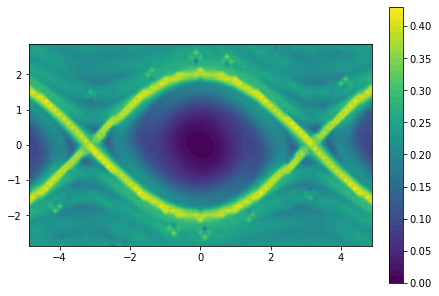

In [40]:
FTLE_field = np.empty((Ny-2, Nx-2))

for xi in range(Nx-2) :
    for yj in range(Ny-2) :
        FTLE_field[yj, xi] = compute_ftle((xi+1), (yj+1), t0, tf)

fig, ax = plt.subplots(layout='constrained')
CS = ax.contourf(X[1:-1, 1:-1], Y[1:-1, 1:-1], FTLE_field, 50)
ax.set_aspect('equal')
cbar = fig.colorbar(CS)

In [44]:
def solve_ivp_backwards(q0, t0=t0, tf=tf):

    def q_dot(t, q):
        d_theta = q[1]
        d_omega = -np.sin(q[0])
        return [-d_theta, -d_omega]

    sol = sp.integrate.solve_ivp(q_dot, [t0, tf], q0)
    theta_t, omega_t = sol.y[0], sol.y[1]

    return theta_t[-1], omega_t[-1]

Xf_bw = np.empty_like(X)
Yf_bw = np.empty_like(X)

for xi in range(len(x)):
    for yj in range(len(y)):
        Xf_bw[yj, xi], Yf_bw[yj, xi] = solve_ivp_backwards([x[xi], y[yj]])

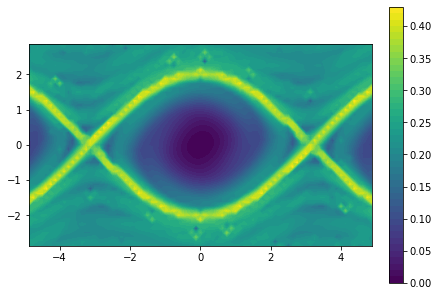

In [45]:

def compute_nftle(xi, yj, t0, tf):

    D = np.zeros((2,2))   # 2D deformation gradient matrix
    D[0,0] = (Xf_bw[yj, xi+1] - Xf_bw[yj, xi-1]) / (X0[yj, xi+1] - X0[yj, xi-1])
    D[0,1] = (Xf_bw[yj+1, xi] - Xf_bw[yj-1, xi]) / (Y0[yj+1, xi] - Y0[yj-1, xi])
    D[1,0] = (Yf_bw[yj, xi+1] - Yf_bw[yj, xi-1]) / (X0[yj, xi+1] - X0[yj, xi-1])
    D[1,1] = (Yf_bw[yj+1, xi] - Yf_bw[yj-1, xi]) / (Y0[yj+1, xi] - Y0[yj-1, xi])

    # CGDtensor = D.T @ D # symmetric square real matrix must have orthogonal eigenvectors,  the SV's are the absolute values of the eigenvalues
    # _, SV, _ = np.linalg.svd(CGDtensor, hermitian=True)

    _, SV, _ = np.linalg.svd(D)
    if SV[0] < 1:
        SV = np.ones_like(SV)
    else:
        SV[1] = 1/SV[0]

    ftle = np.log(SV[0]) / np.abs(tf-t0)
    
    return ftle


nFTLE_field = np.empty((Ny-2, Nx-2))

for xi in range(Nx-2) :
    for yj in range(Ny-2) :
        nFTLE_field[yj, xi] = compute_nftle((xi+1), (yj+1), t0, tf)

fig, ax = plt.subplots(layout='constrained')
CS = ax.contourf(X[1:-1, 1:-1], Y[1:-1, 1:-1], nFTLE_field, 50)
ax.set_aspect('equal')
cbar = fig.colorbar(CS)